In [20]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
#set seaborn graphics
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [21]:
#read data
df = pd.read_pickle('infldf.pkl')
df.index = df['SurveyDate']
df = df.drop('SurveyDate', axis=1)

In [22]:
def bf_melt(df, col, dummy, listd):
    df[dummy] = 0
    dforig = df.copy()
    df['SD'] = df.index
    df = df.drop_duplicates(subset=['SD'], keep='first')
    df1 = df.copy()
    df1[listd] = 0
    df1['CurrentYearDiff'] = df1[col]
    df1[dummy] = 1
    df1 = df1.drop('SD', axis=1)
    dfnew = pd.concat([dforig, df1], axis=0)
    return dfnew.sort_index()

# load shocks

In [24]:
#EOP DEFINITION
mpdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Monetary Event Window')
mpdf.index = mpdf['date']
prdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Press Release Window')
prdf.index = prdf['date']
pcdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Press Conference Window')
pcdf.index = pcdf['date']
dates_list = df.index.unique()
date1=dates_list[0]
date2=dates_list[1]
newdf = mpdf.loc[(mpdf.index<date1)].tail(1)
for i in range(0, len(dates_list)-1):
    newdfwork = mpdf.loc[(mpdf.index>dates_list[i])&(mpdf.index<dates_list[i+1])].tail(1)
    #print(newdfwork)
    newdf = newdf.append(newdfwork)
newdf.index = dates_list
#repeat same for press conference
dates_list = df.index.unique()
date1=dates_list[0]
date2=dates_list[1]
newdfpr = prdf.loc[(prdf.index<date1)].tail(1)
for i in range(0, len(dates_list)-1):
    #newdfprwork = prdf.loc[(prdf.index>dates_list[i])&(prdf.index<dates_list[i+1])].tail(1)
    newdfpr = newdfpr.append(prdf.loc[(prdf.index>dates_list[i])&(prdf.index<dates_list[i+1])].tail(1))
newdfpr.index = dates_list

#repeat same for press release
dates_list = df.index.unique()
date1=dates_list[0]
date2=dates_list[1]
newdfpc = pcdf.loc[(pcdf.index<date1)].tail(1)
for i in range(0, len(dates_list)-1):
    newdfpc = newdfpc.append(pcdf.loc[(pcdf.index>dates_list[i])&(pcdf.index<dates_list[i+1])].tail(1))
newdfpc.index = dates_list

#SUM DEFINITION
mpdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Monetary Event Window')
mpdf.index = mpdf['date']
prdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Press Release Window')
prdf.index = prdf['date']
pcdf = pd.read_excel('Dataset_EA-MPD.xlsx', sheet_name='Press Conference Window')
pcdf.index = pcdf['date']
dates_list = df.index.unique()
date1=dates_list[0]
date2=dates_list[1]
newdfsum = mpdf.loc[(mpdf.index<date1)].tail(1)
for i in range(0, len(dates_list)-1):
    newdfworksum = mpdf.loc[(mpdf.index>dates_list[i])&(mpdf.index<dates_list[i+1])].sum()
    #print(newdfwork)
    newdfsum = newdfsum.append(newdfwork, ignore_index = True)
newdfsum.index = dates_list
#repeat same for press conference
dates_list = df.index.unique()
date1=dates_list[0]
date2=dates_list[1]
newdfprsum = prdf.loc[(prdf.index<date1)].tail(1)
for i in range(0, len(dates_list)-1):
    #newdfprwork = prdf.loc[(prdf.index>dates_list[i])&(prdf.index<dates_list[i+1])].tail(1)
    newdfprsum = newdfprsum.append(prdf.loc[(prdf.index>dates_list[i])&(prdf.index<dates_list[i+1])].sum(), ignore_index = True)
newdfprsum.index = dates_list

#repeat same for press release
dates_list = df.index.unique()
date1=dates_list[0]
date2=dates_list[1]
newdfpcsum = pcdf.loc[(pcdf.index<date1)].tail(1)
for i in range(0, len(dates_list)-1):
    newdfpcsum = newdfpcsum.append(pcdf.loc[(pcdf.index>dates_list[i])&(pcdf.index<dates_list[i+1])].sum(),ignore_index = True)
newdfpcsum.index = dates_list

In [26]:
df['Current Year'] = df['Current Year'].astype(float)
df['One Year Ahead'] = df['One Year Ahead'].astype(float)
df['Longer Term'] = df['Longer Term'].astype(float)
df['Rolling1'] = df['Rolling1'].astype(float)
df['Rolling2'] = df['Rolling2'].astype(float)
df1 = df.sort_values(by=['Source', 'SurveyDate'],ascending = [True, True])
df1['CurrentYearDiff'] = df1['Current Year'].diff()
df1['OneYearDiff'] = df1['One Year Ahead'].diff()
df1['LongTermDiff'] = df1['Longer Term'].diff()
df1['R1'] = df1['Rolling1'].diff()
df1['R2'] = df1['Rolling2'].diff()
df1 = df1.sort_index()
#df1 = df1.dropna()
#df1.index = df1['SurveyDate']
df1

,Source,Current Year,One Year Ahead,Rolling1,Rolling2,Longer Term,CurrentYearDiff,OneYearDiff,LongTermDiff,R1,R2
SurveyDate,,,,,,,,,,,
1999-02-12,1,1.0,1.5,1.2,1.7,1.8,NaN,NaN,NaN,NaN,NaN
1999-02-12,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-12,11,1.2,1.5,1.5,1.6,2.0,0.2,0.5,0.5,0.6,0.5
1999-02-12,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-12,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-01-13,90,1.0,1.3,1.0,1.4,1.7,NaN,NaN,NaN,NaN,NaN
2020-01-13,91,1.3,1.3,1.2,1.2,1.4,NaN,NaN,NaN,NaN,NaN
2020-01-13,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


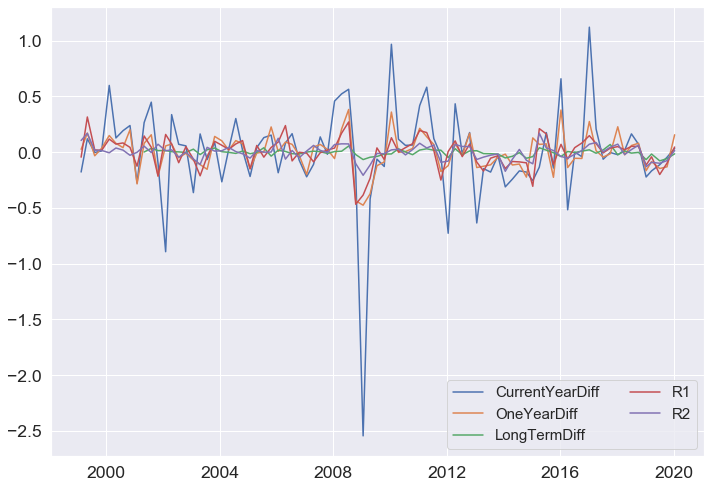

In [27]:
df1means = df1.groupby('SurveyDate')[['CurrentYearDiff','OneYearDiff', 'LongTermDiff', 'R1', 'R2']].mean()
df1means.index = df1.index.unique()
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1.6)
plt.plot(df1means)
plt.legend(list(df1means), ncol=2, loc='lower right', fontsize=15)

# regressions estimation

In [2]:
dataols = pd.concat([df1means, newdfpc], axis=1)
dataols = bf_melt(dataols, 'OneYearDiff', 'FI', [])
dataols = bf_melt(dataols, 'R1', 'dR1', ['FI'])
dataols = bf_melt(dataols, 'R2', 'dR2', ['FI', 'dR1'])
#dataols = pd.concat([df1gdpmeans, newdfpc], axis=1)
var = 'OIS_2Y'
dataols = dataols.dropna(subset = [var])
dataols = dataols.loc[(dataols.index>'2002-01-01')&(dataols.index<'2014-01-01')]
#dataols = dataols.loc[(dataols.index>'2014-01-01')]
#next year dummies
dataols['D1'] = (dataols.index.month.isin([3,4])==True)*1*dataols['FI']
dataols['D2'] = (dataols.index.month.isin([7,8])==True)*1*dataols['FI']
dataols['D3'] = (dataols.index.month.isin([10,11])==True)*1*dataols['FI']
#current year dummies
dataols['D4'] = (dataols.index.month.isin([3,4])==True)*1*(1-dataols['FI'])*(1-dataols['dR1'])*(1-dataols['dR2'])  
dataols['D5'] = (dataols.index.month.isin([7,8])==True)*1*(1-dataols['FI'])*(1-dataols['dR1'])*(1-dataols['dR2'])
dataols['D6'] = (dataols.index.month.isin([10,11])==True)*1*(1-dataols['FI'])*(1-dataols['dR1'])*(1-dataols['dR2'])
dataols['D7'] = 1*dataols['dR2']
dataols['D8'] = 1*dataols['dR1']
exog = dataols[['D1', 'D2', 'D3', 'D4', 'D5', 'D6',  'D7', 'D8', var]]
#exog = dataols[[var]]
endog = dataols['CurrentYearDiff']

NameError: name 'pd' is not defined

In [1]:
dataols['CurrentYearDiff', 'R1']

NameError: name 'dataols' is not defined

In [119]:
class mpGMM(GMM):
    
    def __init__(self, *args, **kwds):
        # set appropriate counts for moment conditions and parameters
        # TODO: clean up signature
        kwds.setdefault('k_moms', 8)
        kwds.setdefault('k_params', 7)
        super(mpGMM, self).__init__(*args, **kwds)


    def momcond(self, params):
        c0, c1, c2, c3, c4, c5, c6= params
        endog = self.endog
        exog = self.exog
        mp = exog[:,8]
        error1 = mp*(endog-mp*(1/4*c0+1/2*c1+3/4*c2+1*c3+3/4*c4+1/2*c5+1/4*c6))*exog[:,0]
        error2 = mp*(endog-mp*(1/2*c0+3/4*c1+1*c2+3/4*c3+1/2*c4+1/4*c5))*exog[:,1]
        error3 = mp*(endog-mp*(3/4*c0+1*c1+3/4*c2+1/2*c3+1/4*c4))*exog[:,2]
        error4 = mp*(endog-mp*(3/4*c0+1/2*c1+1/4*c2))*exog[:,3]
        error5 = mp*(endog-mp*(1/2*c0+1/4*c1))*exog[:,4]
        error6 = mp*(endog-mp*(1/4*c0))*exog[:,5]
        error7 = mp*(endog-mp*(0*c0+1/4*c1+1/2*c2+3/4*c3+1*c4+3/4*c5+1/2*c6))*exog[:,6]
        error8 = mp*(endog-mp*(1*c0+3/4*c1+1/2*c2))*exog[:,7]
        g = np.column_stack((error1, error2, error3, error4, error5, error6, error7, error8))
        return g

In [120]:
model = mpGMM(endog, exog, None)
beta0 = np.zeros((1, 7))
#get weight matrix
res = model.fititer(beta0, maxiter=100, wargs=dict(maxlag=0), weights_method='hac')
w0 = res[1]
inv_weights = np.linalg.inv(w0)
res = model.fit(beta0, maxiter=2, inv_weights =inv_weights, wargs=dict(maxlag=0), weights_method='hac')
print(res.summary(yname='Inflation forecast diff', xname=['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6']))

Optimization terminated successfully.
         Current function value: 0.000151
         Iterations: 27
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.009428
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.009532
         Iterations: 12
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.009502
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.009518
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.009513
         Iterations: 12
         Function evaluations: 15
  

# include ECB projections

In [16]:
ecb_infl = pd.read_pickle('ecbdiffhicp.pkl')
newindex = df1means.index[:-1]
newindex = newindex[len(newindex)-len(ecb_infl):]
ecb_infl.index = newindex
newdf_ecb = pd.concat([df1means, ecb_infl[['CY', '1Y']]], axis=1)

In [17]:
t4 = np.zeros((8, 17))
t4[:, :-9] = qw_inv1
t4

array([[-2.00000000e+00,  4.00000000e+00, -2.00000000e+00,
        -1.55431223e-16, -4.00000000e+00,  8.00000000e+00,
        -4.00000000e+00, -1.55431223e-15,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 4.00000000e+00, -8.00000000e+00,  4.00000000e+00,
         4.44089210e-16,  8.00000000e+00, -1.60000000e+01,
         8.00000000e+00,  4.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-2.00000000e+00,  4.00000000e+00, -2.00000000e+00,
        -8.88178420e-16, -4.00000000e+00,  8.00000000e+00,
         0.00000000e+00, -8.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.0

                            OLS Regression Results                            
Dep. Variable:        CurrentYearDiff   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     6.538
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           4.42e-09
Time:                        01:16:33   Log-Likelihood:                -26.341
No. Observations:                  96   AIC:                             86.68
Df Residuals:                      79   BIC:                             130.3
Df Model:                          16                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
D1            -0.0092      0.016     -0.562      0.5

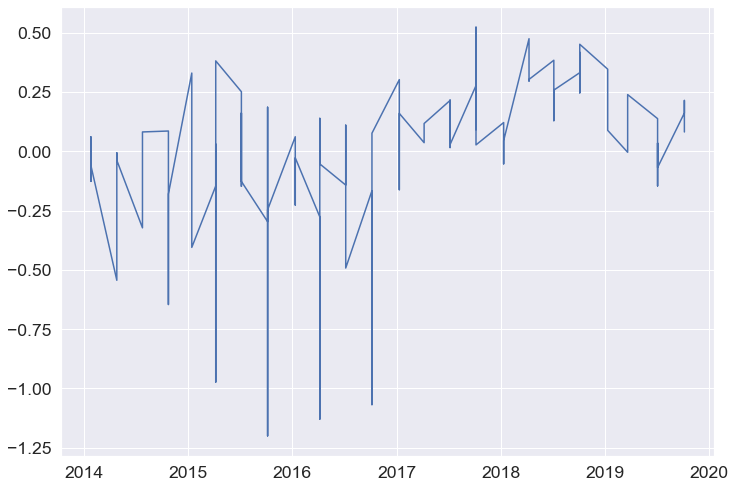

In [19]:
dataols = pd.concat([newdf_ecb, newdfpcsum], axis=1)
dataols = bf_melt(dataols, 'OneYearDiff', 'FI', [])
dataols = bf_melt(dataols, 'R1', 'dR1', ['FI'])
dataols = bf_melt(dataols, 'R2', 'dR2', ['FI', 'dR1'])
#dataols = pd.concat([df1gdpmeans, newdfpc], axis=1)
var = 'OIS_2Y'
dataols = dataols.dropna(subset = [var])
#dataols = dataols.loc[(dataols.index>'2002-01-01')&(dataols.index<'2014-01-01')]
dataols = dataols.loc[(dataols.index>'2014-01-01')]
#next year dummies
dataols['D1'] = (dataols.index.month.isin([1,2])==True)*dataols[var]*dataols['FI']+dataols[var]*dataols['dR2']
dataols['D2'] = (dataols.index.month.isin([3,4])==True)*dataols[var]*dataols['FI']
dataols['D3'] = (dataols.index.month.isin([7,8])==True)*dataols[var]*dataols['FI']
dataols['D4'] = (dataols.index.month.isin([10,11])==True)*dataols[var]*dataols['FI']
#current year dummies
#current year dummies
dataols['D5'] = (dataols.index.month.isin([1,2])==True)*dataols[var]*(1-dataols['FI'])*(1-dataols['dR1'])*(1-dataols['dR2'])+dataols[var]*dataols['dR1']
dataols['D6'] = (dataols.index.month.isin([3,4])==True)*dataols[var]*(1-dataols['FI'])*(1-dataols['dR1'])*(1-dataols['dR2'])
dataols['D7'] = (dataols.index.month.isin([7,8])==True)*dataols[var]*(1-dataols['FI'])*(1-dataols['dR1'])*(1-dataols['dR2'])
dataols['D8'] = (dataols.index.month.isin([10,11])==True)*dataols[var]*(1-dataols['FI'])*(1-dataols['dR1'])*(1-dataols['dR2'])
#current year ECB forecast
dataols['D9'] = (dataols.index.month.isin([1,2])==True)*dataols['CY']*(1-dataols['FI'])*(1-dataols['dR1'])*(1-dataols['dR2'])
dataols['D10'] = (dataols.index.month.isin([4,5])==True)*dataols['CY']*(1-dataols['FI'])*(1-dataols['dR1'])*(1-dataols['dR2'])
dataols['D11'] = (dataols.index.month.isin([7,8])==True)*dataols['CY']*(1-dataols['FI'])*(1-dataols['dR1'])*(1-dataols['dR2'])
dataols['D12'] = (dataols.index.month.isin([10,11])==True)*dataols['CY']*(1-dataols['FI'])*(1-dataols['dR1'])*(1-dataols['dR2'])
#next year ECB forecast
dataols['D13'] = (dataols.index.month.isin([1,2])==True)*dataols['1Y']
dataols['D14'] = (dataols.index.month.isin([4,5])==True)*dataols['1Y']
dataols['D15'] = (dataols.index.month.isin([7,8])==True)*dataols['1Y']
dataols['D16'] = (dataols.index.month.isin([10,11])==True)*dataols['1Y']

dataols.exog = sm.add_constant(dataols[['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7','D8','D9',
                                        'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16']], prepend=False)
mod24 = sm.OLS(dataols.CurrentYearDiff, dataols.exog, missing='drop')
res24 = mod24.fit(cov_type='HAC',cov_kwds={'maxlags':2})
print(res24.summary())
print(res24.t_test(t4))
plt.plot(res24.resid)

In [200]:
dataols.index.

DatetimeIndex(['2012-10-22', '2012-10-22', '2012-10-22', '2012-10-22',
               '2013-01-22', '2013-01-22', '2013-01-22', '2013-01-22',
               '2013-04-19', '2013-04-19', '2013-04-19', '2013-04-19',
               '2013-07-19', '2013-07-19', '2013-07-19', '2013-07-19',
               '2013-10-22', '2013-10-22', '2013-10-22', '2013-10-22'],
              dtype='datetime64[ns]', name='SurveyDate', freq=None)

                            OLS Regression Results                            
Dep. Variable:            OneYearDiff   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     14.95
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           5.76e-10
Time:                        16:44:41   Log-Likelihood:                 45.161
No. Observations:                  76   AIC:                            -78.32
Df Residuals:                      70   BIC:                            -64.34
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
D1             0.0522      0.011      4.796      0.0

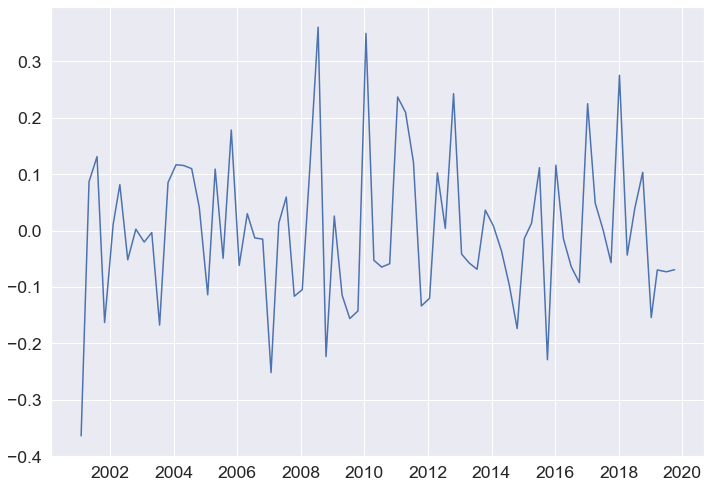

In [24]:
dataols = pd.concat([newdf_ecb, newdfpr], axis=1)
var = 'OIS_3M'
dataols = dataols.dropna(subset = [var])
dataols['D1'] = (dataols.index.month.isin([1,2])==True)*dataols[var]
dataols['D2'] = (dataols.index.month.isin([3,4,5])==True)*dataols[var]
dataols['D3'] = (dataols.index.month.isin([7,8])==True)*dataols[var]
dataols['D4'] = (dataols.index.month.isin([10,11])==True)*dataols[var]
dataols.exog = sm.add_constant(dataols[['D1', 'D2', 'D3', 'D4', '1Y']], prepend=False)
#dataols.exog = sm.add_constant(dataols['D1', 'D2', 'D3', 'D4'], prepend=False)
mod12 = sm.OLS(dataols.OneYearDiff, dataols.exog, missing='drop')
res12 = mod12.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(res12.summary())
print(res12.t_test(t2))
plt.plot(res12.resid)